In [35]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_predict, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import *
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

df_su = pd.read_csv("Simulation_Outputs_su", delimiter="\t")
df = pd.read_csv("Simulation_Outputs_fr", delimiter="\t")
Occupancy = pd.read_csv("Occupancy_per_hour", delimiter="\t")
df2=pd.read_csv("consommation_heat_fr")
df2_su=pd.read_csv("consommation_heat_su")

In [36]:
df_su

,TIME,Temperature_ext_C,Temperature_int_C,Temperature_op_C,QHeat_kJ_h,QCool_kJ_h,Unnamed: 6
0,1.0,5.40,20.0,20.000000,0.000000,0.0,NaN
1,2.0,5.30,19.5,19.648903,1030.945750,0.0,NaN
2,3.0,5.10,19.0,19.344070,584.726912,0.0,NaN
3,4.0,4.95,19.0,19.304032,707.942782,0.0,NaN
4,5.0,4.85,19.0,19.268511,813.585381,0.0,NaN
...,...,...,...,...,...,...,...
8755,8756.0,-0.75,19.0,18.907081,2367.389203,0.0,NaN
8756,8757.0,-0.90,19.0,18.887326,2437.172437,0.0,NaN
8757,8758.0,-1.05,19.0,18.869307,2502.286647,0.0,NaN
8758,8759.0,-1.15,19.0,18.854289,2553.884355,0.0,NaN


In [37]:
col_2 = df.iloc[:, 1].values
col_2_su = df_su.iloc[:, 1].values
col_3 = df.iloc[:, 2].values
temp_ext= pd.DataFrame(col_2.reshape(-1, 24))
temp_ext_su= pd.DataFrame(col_2_su.reshape(-1, 24))
temp_ext_int = pd.DataFrame(np.hstack((col_2.reshape(-1, 24), col_3.reshape(-1, 24))))
col_2_occ = Occupancy.iloc[:, 1].values
Occupancy=  pd.DataFrame(col_2_occ.reshape(-1, 24))
temp_ext_int_occ = pd.DataFrame(np.hstack((col_2.reshape(-1, 24), col_3.reshape(-1, 24), col_2_occ.reshape(-1, 24))))



In [4]:
temp_ext.to_csv("temp_ext",index=False)

In [38]:
temp_ext_int["clusters"]=df2["clusters"]
temp_ext_int_occ["clusters"]=df2["clusters"]
temp_ext["clusters"]=df2["clusters"]

In [39]:
temp_ext_su["clusters"]=df2_su["clusters"]

In [40]:
def standardize_data(X):
    scaler = StandardScaler()
    return scaler.fit_transform(X)

In [41]:
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000),
    "SVC": SVC(random_state=42),
    "KNN": KNeighborsClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

In [42]:
def evaluate_models_split(X_train, X_test, y_train, y_test , models):
  
    
    results = {}
    
    for name, model in models.items():
        print(f"\n Évaluation de {name} avec train_test_split...")
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        cm = confusion_matrix(y_test, y_pred)
        f1 = f1_score(y_test, y_pred, average='weighted')
        accuracy = accuracy_score(y_test, y_pred) 

        results[name] = {"f1_score": f1, "accuracy": accuracy}
        
        plt.figure(figsize=(5,4))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
        plt.xlabel('Prédictions')
        plt.ylabel('Vraies classes')
        plt.title(f'Matrice de confusion - {name}')
        plt.show()
        
        print(f"{name} - Accuracy: {accuracy:.4f} - F1 Score: {f1:.4f}")
        print("###################################################################")
    
    return results


In [43]:


def evaluate_models_cv(X, y, models, cv=4):
    results = {}

    for name, model in models.items():
        print(f"\n Évaluation de {name} avec Cross Validation ({cv}-folds)...")

        scoring = ["accuracy", "f1_weighted"]
        scores = {}

        for metric in scoring:
            score = cross_val_score(model, X, y, cv=StratifiedKFold(n_splits=cv, shuffle=True, random_state=42), scoring=metric)
            scores[metric] = np.mean(score)  
        results[name] = scores

        print(f"{name} - Accuracy: {scores['accuracy']:.4f} - F1 Score: {scores['f1_weighted']:.4f}")
        print("###################################################################")

    return results


*************************************************Prédiction en fonction de TEXT avec 4 clusters*************************************************

 Évaluation de Random Forest avec train_test_split...


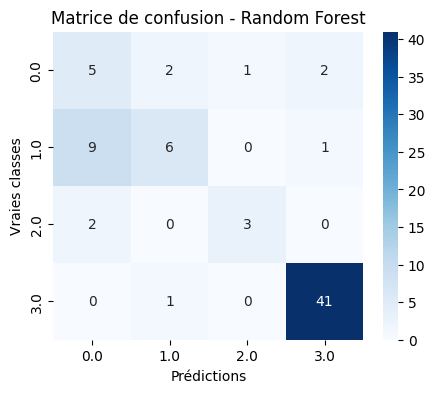

Random Forest - Accuracy: 0.7534 - F1 Score: 0.7521
###################################################################

 Évaluation de Logistic Regression avec train_test_split...


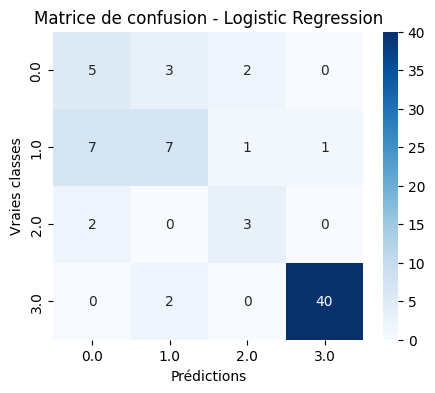

Logistic Regression - Accuracy: 0.7534 - F1 Score: 0.7586
###################################################################

 Évaluation de SVC avec train_test_split...


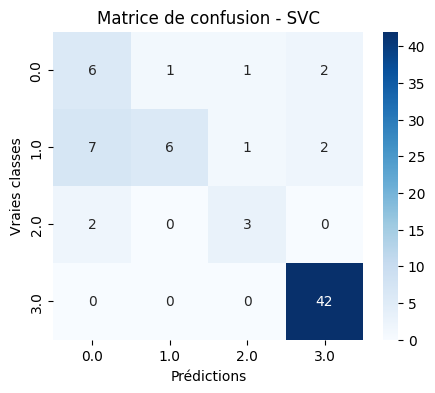

SVC - Accuracy: 0.7808 - F1 Score: 0.7704
###################################################################

 Évaluation de KNN avec train_test_split...


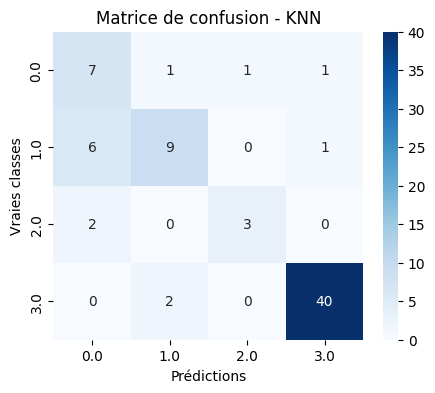

KNN - Accuracy: 0.8082 - F1 Score: 0.8112
###################################################################

 Évaluation de Gradient Boosting avec train_test_split...


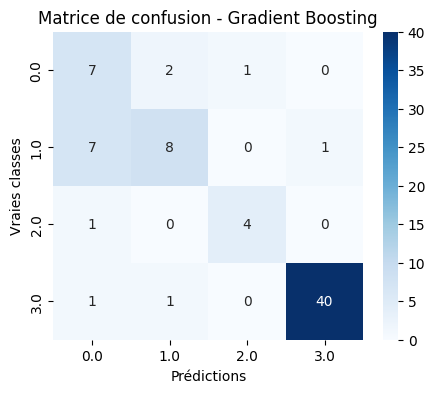

Gradient Boosting - Accuracy: 0.8082 - F1 Score: 0.8130
###################################################################


In [44]:
print("*************************************************Prédiction en fonction de TEXT avec 4 clusters*************************************************")
X=temp_ext.drop(columns=["clusters"])
y=temp_ext["clusters"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=42)
results_split = evaluate_models_split(  X_train, X_test, y_train, y_test, models)

In [45]:
print("*************************************************Prédiction en fonction de TEXT avec 4 clusters*************************************************")
X_norm=standardize_data(X)
results_cv = evaluate_models_cv(X_norm, y, models, cv=4)

*************************************************Prédiction en fonction de TEXT avec 4 clusters*************************************************

 Évaluation de Random Forest avec Cross Validation (4-folds)...
Random Forest - Accuracy: 0.7973 - F1 Score: 0.7994
###################################################################

 Évaluation de Logistic Regression avec Cross Validation (4-folds)...
Logistic Regression - Accuracy: 0.8083 - F1 Score: 0.8025
###################################################################

 Évaluation de SVC avec Cross Validation (4-folds)...
SVC - Accuracy: 0.8111 - F1 Score: 0.8085
###################################################################

 Évaluation de KNN avec Cross Validation (4-folds)...
KNN - Accuracy: 0.8055 - F1 Score: 0.8093
###################################################################

 Évaluation de Gradient Boosting avec Cross Validation (4-folds)...
Gradient Boosting - Accuracy: 0.7835 - F1 Score: 0.7891
##################

*************************************************Prédiction en fonction de TEXT avec 3 clusters*************************************************

 Évaluation de Random Forest avec train_test_split...


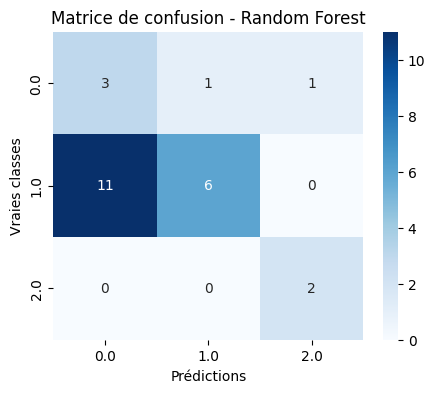

Random Forest - Accuracy: 0.4583 - F1 Score: 0.4866
###################################################################

 Évaluation de Logistic Regression avec train_test_split...


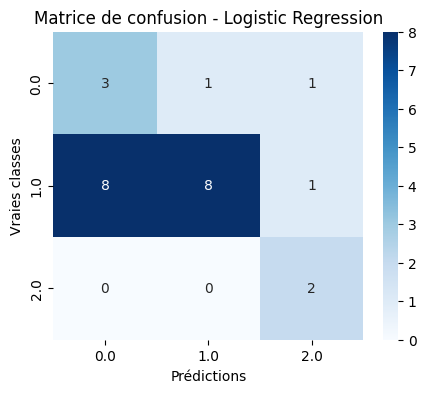

Logistic Regression - Accuracy: 0.5417 - F1 Score: 0.5696
###################################################################

 Évaluation de SVC avec train_test_split...


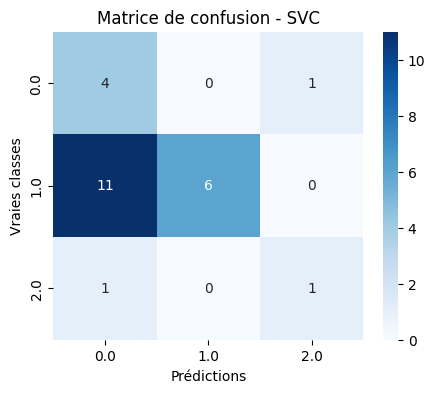

SVC - Accuracy: 0.4583 - F1 Score: 0.4906
###################################################################

 Évaluation de KNN avec train_test_split...


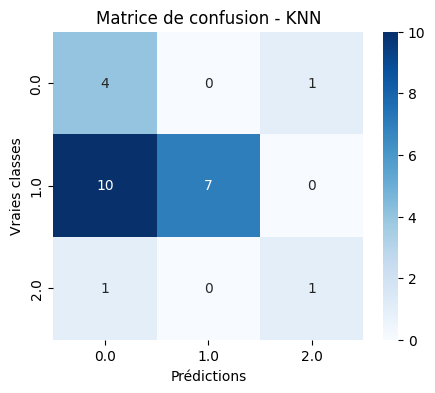

KNN - Accuracy: 0.5000 - F1 Score: 0.5382
###################################################################

 Évaluation de Gradient Boosting avec train_test_split...


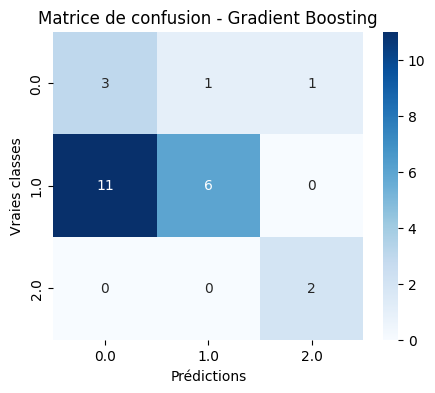

Gradient Boosting - Accuracy: 0.4583 - F1 Score: 0.4866
###################################################################


In [46]:
print("*************************************************Prédiction en fonction de TEXT avec 3 clusters*************************************************")
temp_ext2=temp_ext[temp_ext["clusters"]!=3]
X=temp_ext2.drop(columns=["clusters"])
y=temp_ext2["clusters"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=42)
results_split = evaluate_models_split(  X_train, X_test, y_train, y_test, models)

In [47]:
print("*************************************************Prédiction en fonction de TEXT avec 3 clusters*************************************************")
X_norm=standardize_data(X)
results_cv = evaluate_models_cv(X_norm, y, models, cv=4)

*************************************************Prédiction en fonction de TEXT avec 3 clusters*************************************************

 Évaluation de Random Forest avec Cross Validation (4-folds)...
Random Forest - Accuracy: 0.6474 - F1 Score: 0.6430
###################################################################

 Évaluation de Logistic Regression avec Cross Validation (4-folds)...
Logistic Regression - Accuracy: 0.6557 - F1 Score: 0.6573
###################################################################

 Évaluation de SVC avec Cross Validation (4-folds)...
SVC - Accuracy: 0.6313 - F1 Score: 0.6286
###################################################################

 Évaluation de KNN avec Cross Validation (4-folds)...
KNN - Accuracy: 0.6652 - F1 Score: 0.6639
###################################################################

 Évaluation de Gradient Boosting avec Cross Validation (4-folds)...
Gradient Boosting - Accuracy: 0.5977 - F1 Score: 0.5990
##################

**********************************************Prédiction en fonction de TEXT et TINT avec 4 clusters**********************************************

 Évaluation de Random Forest avec train_test_split...


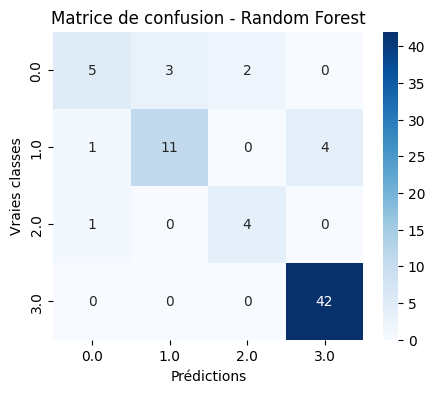

Random Forest - Accuracy: 0.8493 - F1 Score: 0.8403
###################################################################

 Évaluation de Logistic Regression avec train_test_split...


C:\Users\toubia\anaconda3\envs\notebook\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


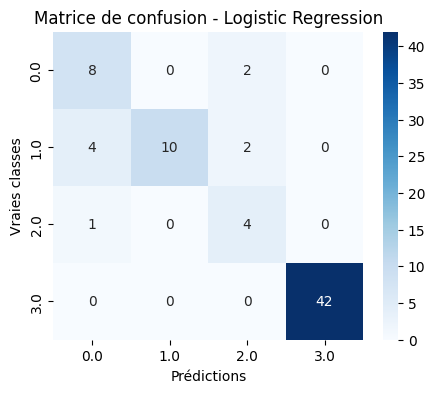

Logistic Regression - Accuracy: 0.8767 - F1 Score: 0.8814
###################################################################

 Évaluation de SVC avec train_test_split...


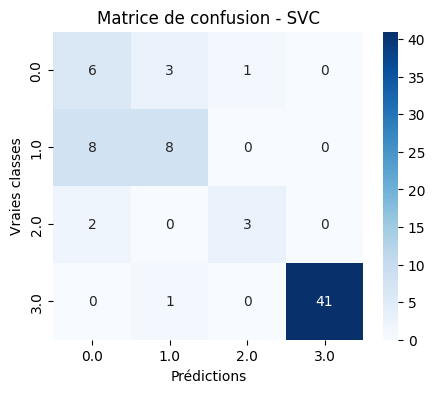

SVC - Accuracy: 0.7945 - F1 Score: 0.8025
###################################################################

 Évaluation de KNN avec train_test_split...


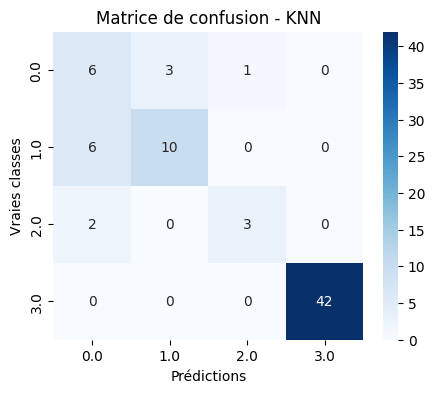

KNN - Accuracy: 0.8356 - F1 Score: 0.8407
###################################################################

 Évaluation de Gradient Boosting avec train_test_split...


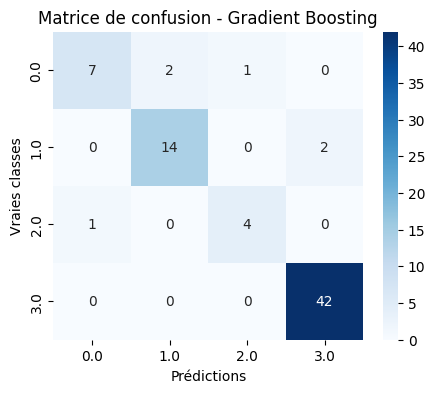

Gradient Boosting - Accuracy: 0.9178 - F1 Score: 0.9151
###################################################################


In [48]:
print("**********************************************Prédiction en fonction de TEXT et TINT avec 4 clusters**********************************************")
X=temp_ext_int.drop(columns=["clusters"])
y=temp_ext_int["clusters"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=42)
results_split = evaluate_models_split(  X_train, X_test, y_train, y_test, models)

In [49]:
print("**********************************************Prédiction en fonction de TEXT et TINT avec 4 clusters**********************************************")
X_norm=standardize_data(X)
results_cv = evaluate_models_cv(X_norm, y, models, cv=4)

**********************************************Prédiction en fonction de TEXT et TINT avec 4 clusters**********************************************

 Évaluation de Random Forest avec Cross Validation (4-folds)...
Random Forest - Accuracy: 0.9290 - F1 Score: 0.9280
###################################################################

 Évaluation de Logistic Regression avec Cross Validation (4-folds)...
Logistic Regression - Accuracy: 0.9043 - F1 Score: 0.9054
###################################################################

 Évaluation de SVC avec Cross Validation (4-folds)...
SVC - Accuracy: 0.8823 - F1 Score: 0.8786
###################################################################

 Évaluation de KNN avec Cross Validation (4-folds)...
KNN - Accuracy: 0.8851 - F1 Score: 0.8863
###################################################################

 Évaluation de Gradient Boosting avec Cross Validation (4-folds)...
Gradient Boosting - Accuracy: 0.9563 - F1 Score: 0.9564
################

**********************************************Prédiction en fonction de TEXT et TINT avec 3 clusters**********************************************

 Évaluation de Random Forest avec train_test_split...


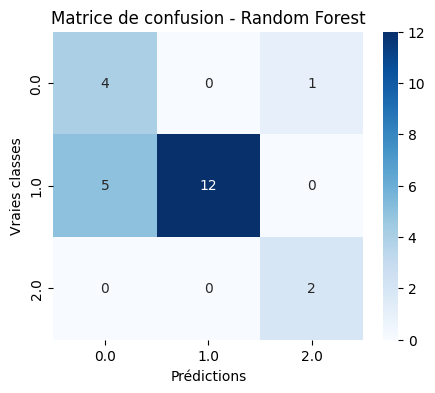

Random Forest - Accuracy: 0.7500 - F1 Score: 0.7719
###################################################################

 Évaluation de Logistic Regression avec train_test_split...


C:\Users\toubia\anaconda3\envs\notebook\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


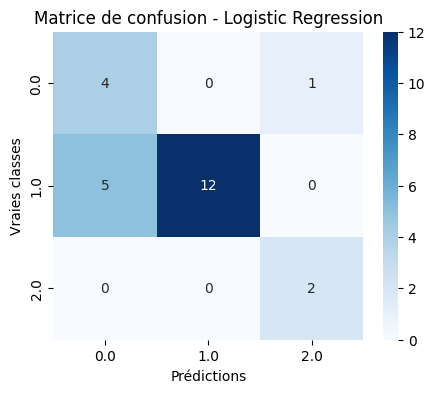

Logistic Regression - Accuracy: 0.7500 - F1 Score: 0.7719
###################################################################

 Évaluation de SVC avec train_test_split...


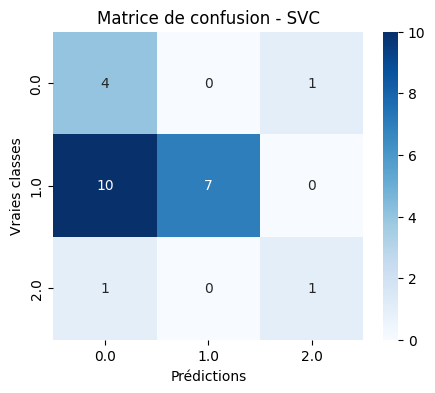

SVC - Accuracy: 0.5000 - F1 Score: 0.5382
###################################################################

 Évaluation de KNN avec train_test_split...


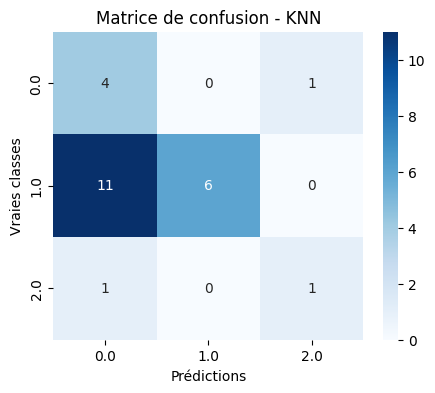

KNN - Accuracy: 0.4583 - F1 Score: 0.4906
###################################################################

 Évaluation de Gradient Boosting avec train_test_split...


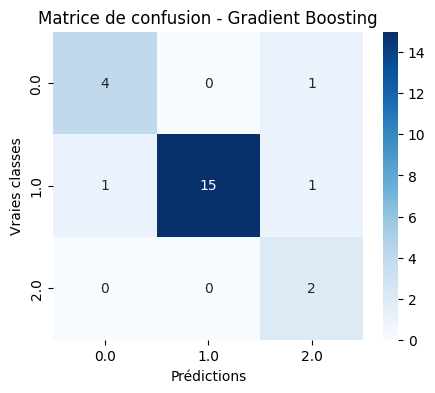

Gradient Boosting - Accuracy: 0.8750 - F1 Score: 0.8863
###################################################################


In [50]:
print("**********************************************Prédiction en fonction de TEXT et TINT avec 3 clusters**********************************************")
temp_ext_int2=temp_ext_int[temp_ext_int["clusters"]!=3]
X=temp_ext_int2.drop(columns=["clusters"])
y=temp_ext_int2["clusters"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=42)
results_split = evaluate_models_split(  X_train, X_test, y_train, y_test, models)

In [51]:
print("**********************************************Prédiction en fonction de TEXT et TINT avec 3 clusters**********************************************")
X_norm=standardize_data(X)
results_cv = evaluate_models_cv(X_norm, y, models, cv=4)

**********************************************Prédiction en fonction de TEXT et TINT avec 3 clusters**********************************************

 Évaluation de Random Forest avec Cross Validation (4-folds)...
Random Forest - Accuracy: 0.8405 - F1 Score: 0.8387
###################################################################

 Évaluation de Logistic Regression avec Cross Validation (4-folds)...
Logistic Regression - Accuracy: 0.8313 - F1 Score: 0.8347
###################################################################

 Évaluation de SVC avec Cross Validation (4-folds)...
SVC - Accuracy: 0.7560 - F1 Score: 0.7568
###################################################################

 Évaluation de KNN avec Cross Validation (4-folds)...
KNN - Accuracy: 0.7480 - F1 Score: 0.7475
###################################################################

 Évaluation de Gradient Boosting avec Cross Validation (4-folds)...
Gradient Boosting - Accuracy: 0.8661 - F1 Score: 0.8621
################

*******************************************Prédiction en fonction de TEXT et TINT et occupation avec 4 clusters*******************************************

 Évaluation de Random Forest avec train_test_split...


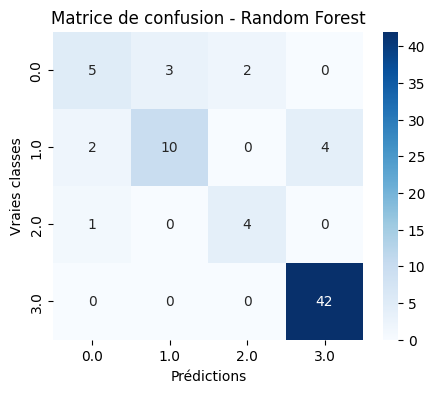

Random Forest - Accuracy: 0.8356 - F1 Score: 0.8263
###################################################################

 Évaluation de Logistic Regression avec train_test_split...


C:\Users\toubia\anaconda3\envs\notebook\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


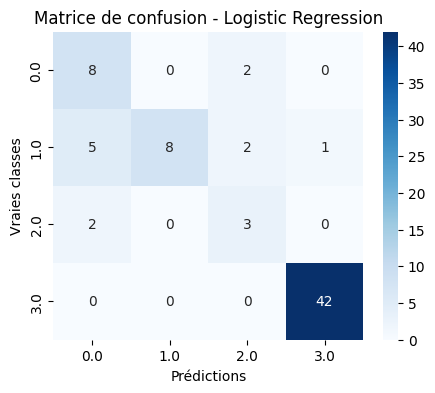

Logistic Regression - Accuracy: 0.8356 - F1 Score: 0.8366
###################################################################

 Évaluation de SVC avec train_test_split...


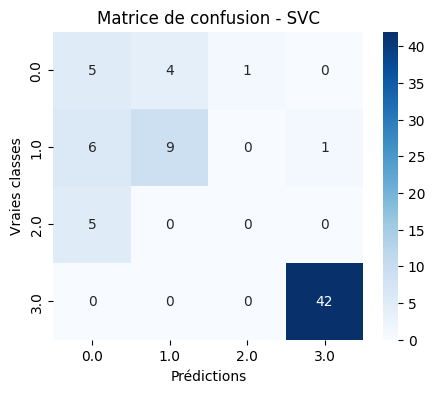

SVC - Accuracy: 0.7671 - F1 Score: 0.7573
###################################################################

 Évaluation de KNN avec train_test_split...


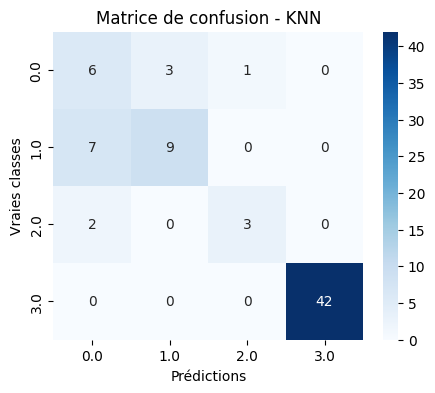

KNN - Accuracy: 0.8219 - F1 Score: 0.8277
###################################################################

 Évaluation de Gradient Boosting avec train_test_split...


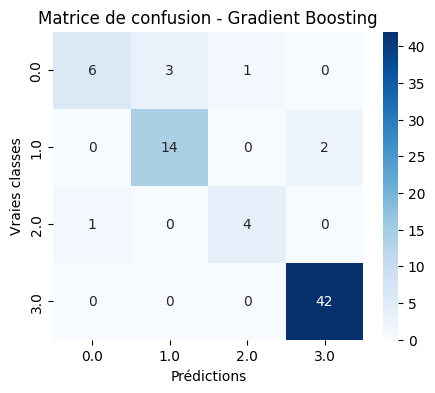

Gradient Boosting - Accuracy: 0.9041 - F1 Score: 0.8994
###################################################################


In [52]:
print("*******************************************Prédiction en fonction de TEXT et TINT et occupation avec 4 clusters*******************************************")
X=temp_ext_int_occ.drop(columns=["clusters"])
y=temp_ext_int_occ["clusters"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=42)
results_split = evaluate_models_split(  X_train, X_test, y_train, y_test, models)

In [53]:
print("*******************************************Prédiction en fonction de TEXT et TINT  et occupation avec 4 clusters*******************************************")
X_norm=standardize_data(X)
results_cv = evaluate_models_cv(X_norm, y, models, cv=4)

*******************************************Prédiction en fonction de TEXT et TINT  et occupation avec 4 clusters*******************************************

 Évaluation de Random Forest avec Cross Validation (4-folds)...
Random Forest - Accuracy: 0.9153 - F1 Score: 0.9145
###################################################################

 Évaluation de Logistic Regression avec Cross Validation (4-folds)...
Logistic Regression - Accuracy: 0.9098 - F1 Score: 0.9107
###################################################################

 Évaluation de SVC avec Cross Validation (4-folds)...
SVC - Accuracy: 0.8659 - F1 Score: 0.8629
###################################################################

 Évaluation de KNN avec Cross Validation (4-folds)...
KNN - Accuracy: 0.8714 - F1 Score: 0.8719
###################################################################

 Évaluation de Gradient Boosting avec Cross Validation (4-folds)...
Gradient Boosting - Accuracy: 0.9508 - F1 Score: 0.9505
#######

**********************************************Prédiction en fonction de TEXT et TINT et occupation avec 3 clusters**********************************************

 Évaluation de Random Forest avec train_test_split...


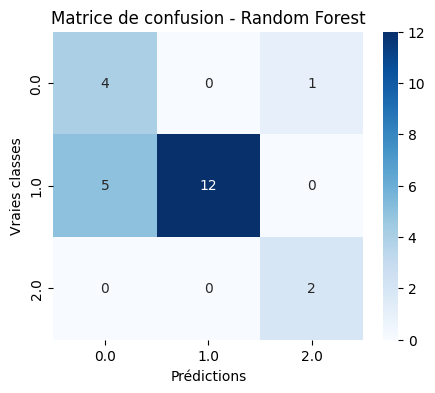

Random Forest - Accuracy: 0.7500 - F1 Score: 0.7719
###################################################################

 Évaluation de Logistic Regression avec train_test_split...


C:\Users\toubia\anaconda3\envs\notebook\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


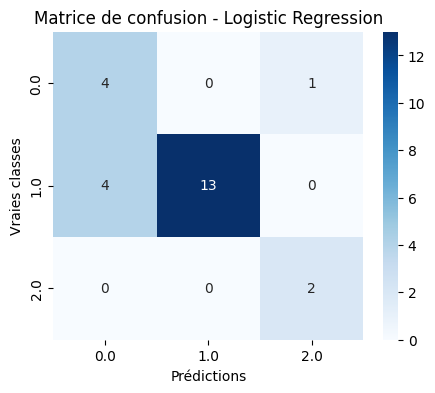

Logistic Regression - Accuracy: 0.7917 - F1 Score: 0.8088
###################################################################

 Évaluation de SVC avec train_test_split...


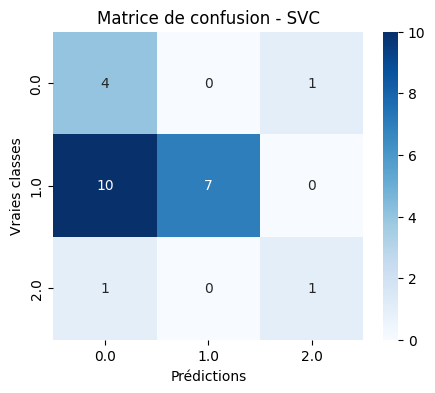

SVC - Accuracy: 0.5000 - F1 Score: 0.5382
###################################################################

 Évaluation de KNN avec train_test_split...


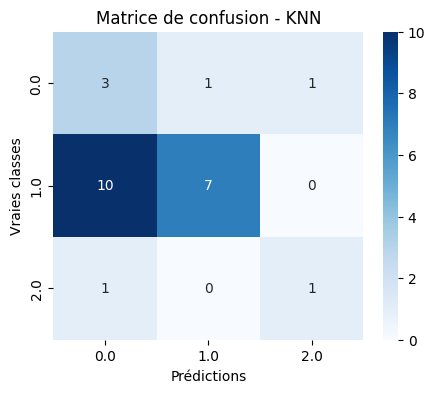

KNN - Accuracy: 0.4583 - F1 Score: 0.5041
###################################################################

 Évaluation de Gradient Boosting avec train_test_split...


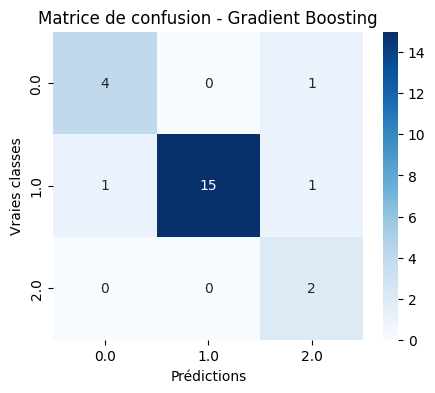

Gradient Boosting - Accuracy: 0.8750 - F1 Score: 0.8863
###################################################################


In [54]:
print("**********************************************Prédiction en fonction de TEXT et TINT et occupation avec 3 clusters**********************************************")
temp_ext_int_occ2=temp_ext_int_occ[temp_ext_int_occ["clusters"]!=3]
X=temp_ext_int_occ2.drop(columns=["clusters"])
y=temp_ext_int_occ2["clusters"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=42)
results_split = evaluate_models_split(  X_train, X_test, y_train, y_test, models)

In [55]:
df_gen=pd.read_csv("df_gen_text_fr.csv")


*******************************************Prédiction en fonction de TEXT avec 4 clusters, incluant les données générées***************************************

 Évaluation de Random Forest avec train_test_split...


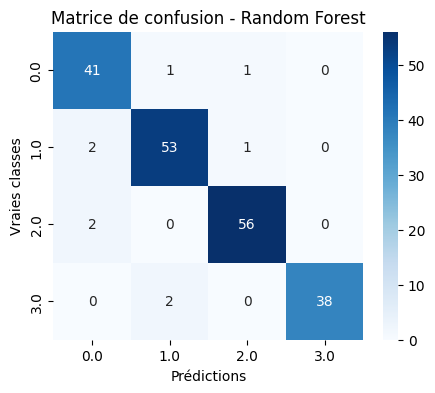

Random Forest - Accuracy: 0.9543 - F1 Score: 0.9545
###################################################################

 Évaluation de Logistic Regression avec train_test_split...


C:\Users\toubia\anaconda3\envs\notebook\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


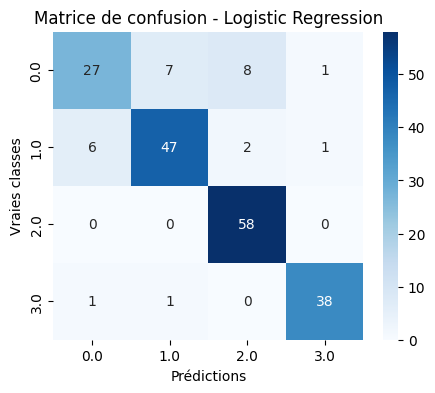

Logistic Regression - Accuracy: 0.8629 - F1 Score: 0.8577
###################################################################

 Évaluation de SVC avec train_test_split...


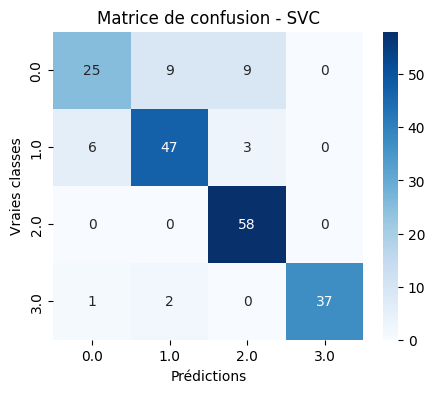

SVC - Accuracy: 0.8477 - F1 Score: 0.8419
###################################################################

 Évaluation de KNN avec train_test_split...


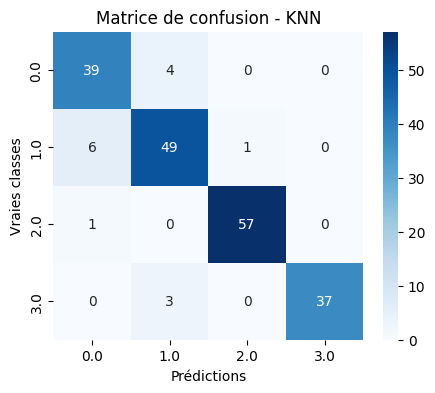

KNN - Accuracy: 0.9239 - F1 Score: 0.9245
###################################################################

 Évaluation de Gradient Boosting avec train_test_split...


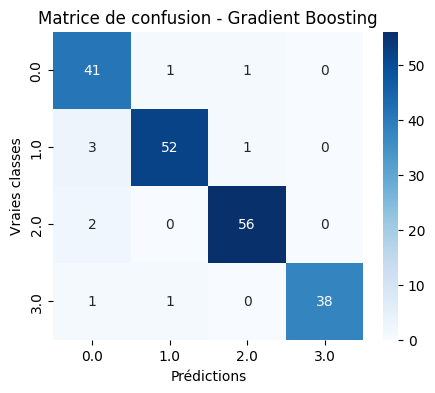

Gradient Boosting - Accuracy: 0.9492 - F1 Score: 0.9497
###################################################################


In [56]:
print("*******************************************Prédiction en fonction de TEXT avec 4 clusters, incluant les données générées***************************************")
X=df_gen.drop(columns=["clusters","is_generated"])
y=df_gen["clusters"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=42)
results_split = evaluate_models_split(  X_train, X_test, y_train, y_test, models)

In [57]:
print("**********************************************Prédiction en fonction de TEXT  avec 4 clusters , incluant les données générées**********************************************")
X_norm=standardize_data(X)
results_cv = evaluate_models_cv(X_norm, y, models, cv=4)

**********************************************Prédiction en fonction de TEXT  avec 4 clusters , incluant les données générées**********************************************

 Évaluation de Random Forest avec Cross Validation (4-folds)...
Random Forest - Accuracy: 0.9248 - F1 Score: 0.9253
###################################################################

 Évaluation de Logistic Regression avec Cross Validation (4-folds)...
Logistic Regression - Accuracy: 0.8140 - F1 Score: 0.8136
###################################################################

 Évaluation de SVC avec Cross Validation (4-folds)...
SVC - Accuracy: 0.7805 - F1 Score: 0.7752
###################################################################

 Évaluation de KNN avec Cross Validation (4-folds)...
KNN - Accuracy: 0.9004 - F1 Score: 0.9009
###################################################################

 Évaluation de Gradient Boosting avec Cross Validation (4-folds)...
Gradient Boosting - Accuracy: 0.9278 - F1 Score

In [58]:
df_sp = pd.read_csv("Simulation_Outputs_sp", delimiter="\t", index_col =False)
df2=pd.read_csv("consommation_fr_sp.csv").iloc[:-365,:]
col_2_sp = df_sp.iloc[:, 1].values
temp_ext_sp= pd.DataFrame(col_2_sp.reshape(-1, 24))
temp_ext_sp["clusters"]=df2["clusters"]

*******************************************Prédiction en fonction de TEXT avec 4 clusters, incluant les données générées   , train sur données générées et test sur données de spain***************************************

 Évaluation de Random Forest avec train_test_split...


C:\Users\toubia\anaconda3\envs\notebook\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


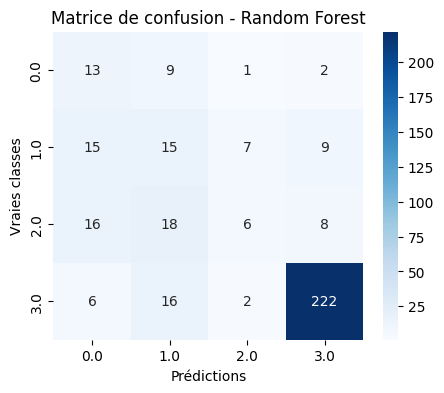

Random Forest - Accuracy: 0.7014 - F1 Score: 0.6992
###################################################################

 Évaluation de Logistic Regression avec train_test_split...


C:\Users\toubia\anaconda3\envs\notebook\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\toubia\anaconda3\envs\notebook\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


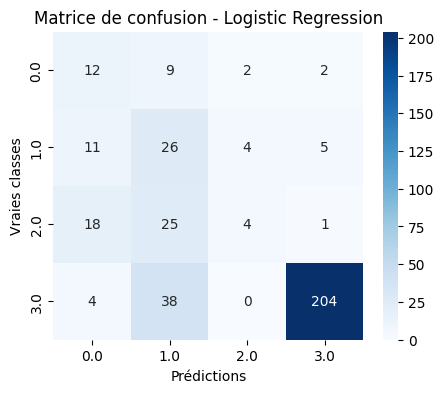

Logistic Regression - Accuracy: 0.6740 - F1 Score: 0.6875
###################################################################

 Évaluation de SVC avec train_test_split...


C:\Users\toubia\anaconda3\envs\notebook\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


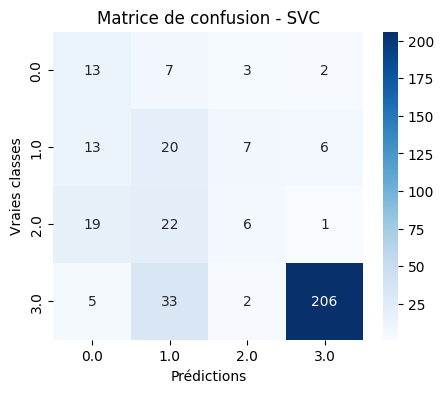

SVC - Accuracy: 0.6712 - F1 Score: 0.6894
###################################################################

 Évaluation de KNN avec train_test_split...


C:\Users\toubia\anaconda3\envs\notebook\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


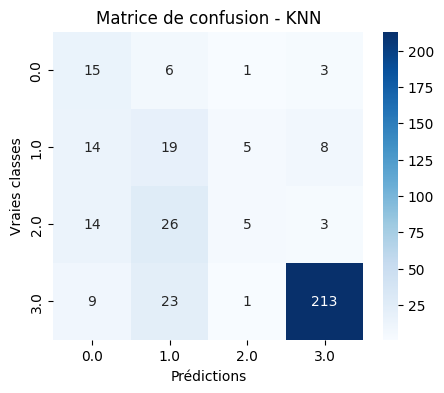

KNN - Accuracy: 0.6904 - F1 Score: 0.6955
###################################################################

 Évaluation de Gradient Boosting avec train_test_split...


C:\Users\toubia\anaconda3\envs\notebook\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


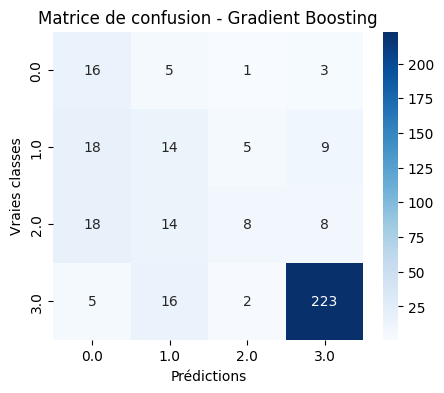

Gradient Boosting - Accuracy: 0.7151 - F1 Score: 0.7115
###################################################################


In [59]:
X_train = df_gen.drop(columns=["clusters","is_generated"])
y_train = df_gen["clusters"]


X_test = temp_ext_sp.drop(columns=["clusters"])
y_test = temp_ext_sp["clusters"]


print("*******************************************Prédiction en fonction de TEXT avec 4 clusters, incluant les données générées   , train sur données générées et test sur données de spain***************************************")
results_split = evaluate_models_split(X_train, X_test, y_train, y_test, models)

In [60]:
df_gen=pd.read_csv("df_gen_text_fr.csv")

*******************************************Prédiction en fonction de TEXT avec 4 clusters, incluant les données générées***************************************

 Évaluation de Random Forest avec train_test_split...


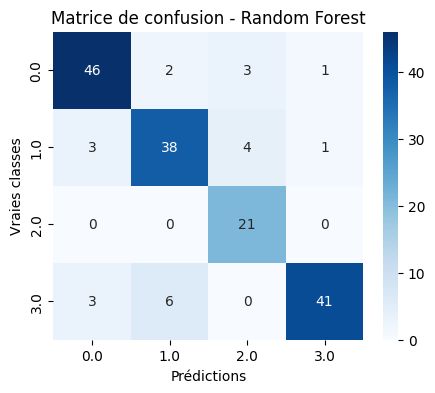

Random Forest - Accuracy: 0.8639 - F1 Score: 0.8644
###################################################################

 Évaluation de Logistic Regression avec train_test_split...


C:\Users\toubia\anaconda3\envs\notebook\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


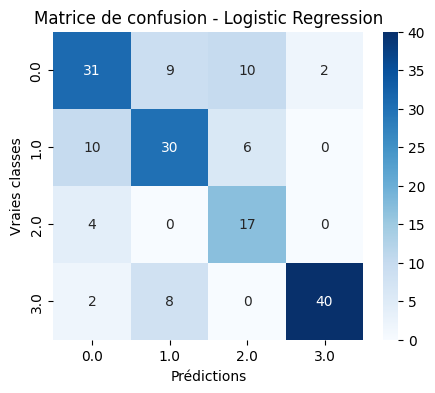

Logistic Regression - Accuracy: 0.6982 - F1 Score: 0.7038
###################################################################

 Évaluation de SVC avec train_test_split...


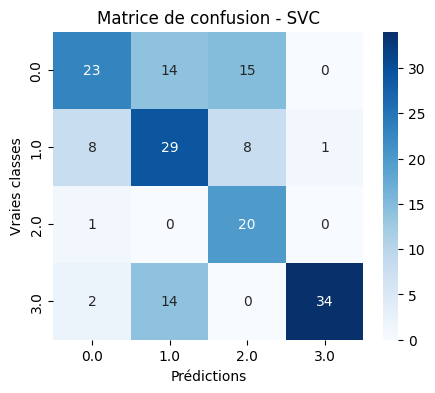

SVC - Accuracy: 0.6272 - F1 Score: 0.6322
###################################################################

 Évaluation de KNN avec train_test_split...


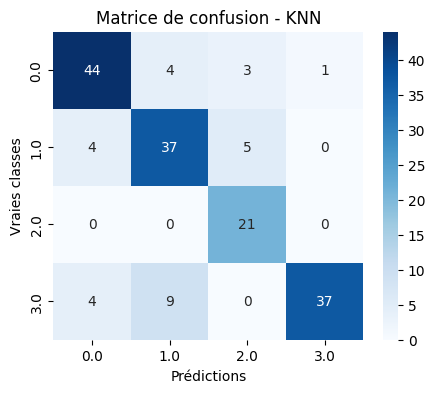

KNN - Accuracy: 0.8225 - F1 Score: 0.8233
###################################################################

 Évaluation de Gradient Boosting avec train_test_split...


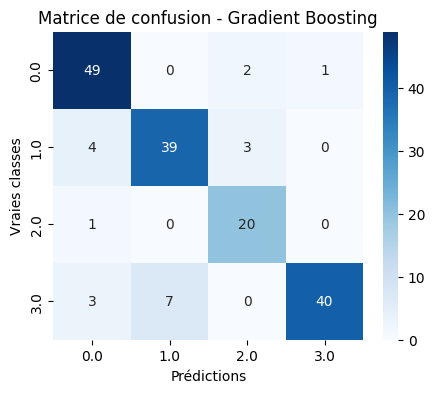

Gradient Boosting - Accuracy: 0.8757 - F1 Score: 0.8756
###################################################################


In [61]:
generated_data = df_gen[df_gen["is_generated"] == True]
real_data = df_gen[df_gen["is_generated"] == False]

X_train_final = []
y_train_final = []
X_test_final = []
y_test_final = []


for cluster_num in [0, 1, 2]:

    real_cluster_data = real_data[real_data["clusters"] == cluster_num]
    generated_cluster_data = generated_data[generated_data["clusters"] == cluster_num]
    X_train_final.append(generated_cluster_data.drop(columns=["clusters", "is_generated"]))
    y_train_final.append(generated_cluster_data["clusters"])
    
    X_test_final.append(real_cluster_data.drop(columns=["clusters", "is_generated"]))
    y_test_final.append(real_cluster_data["clusters"])

cluster_3_data = real_data[real_data["clusters"] == 3]
X_train_cluster_3, X_test_cluster_3, y_train_cluster_3, y_test_cluster_3 = train_test_split(
    cluster_3_data.drop(columns=["clusters", "is_generated"]),
    cluster_3_data["clusters"],
    test_size=0.2,
    random_state=42
)


X_train_final.append(X_train_cluster_3)
y_train_final.append(y_train_cluster_3)
X_test_final.append(X_test_cluster_3)
y_test_final.append(y_test_cluster_3)

X_train_final = pd.concat(X_train_final, axis=0)
y_train_final = pd.concat(y_train_final, axis=0)
X_test_final = pd.concat(X_test_final, axis=0)
y_test_final = pd.concat(y_test_final, axis=0)


print("*******************************************Prédiction en fonction de TEXT avec 4 clusters, incluant les données générées***************************************")
results_split = evaluate_models_split(X_train_final, X_test_final, y_train_final, y_test_final, models)


*************************************************Prédiction en fonction de TEXT avec 4 clusters  en suede*************************************************

 Évaluation de Random Forest avec train_test_split...


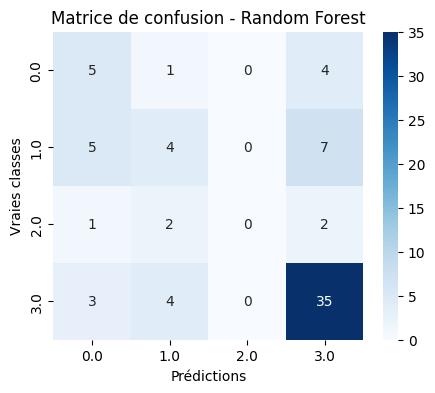

Random Forest - Accuracy: 0.6027 - F1 Score: 0.5695
###################################################################

 Évaluation de Logistic Regression avec train_test_split...


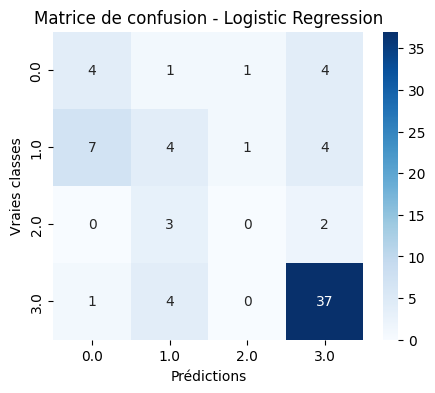

Logistic Regression - Accuracy: 0.6164 - F1 Score: 0.5908
###################################################################

 Évaluation de SVC avec train_test_split...


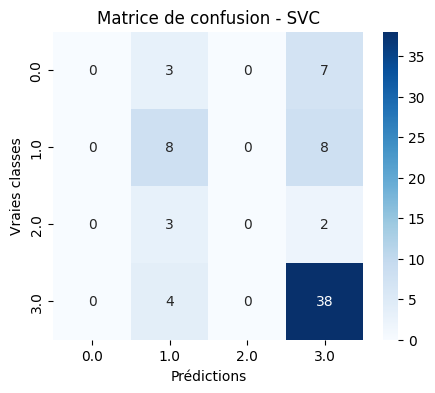

SVC - Accuracy: 0.6301 - F1 Score: 0.5539
###################################################################

 Évaluation de KNN avec train_test_split...


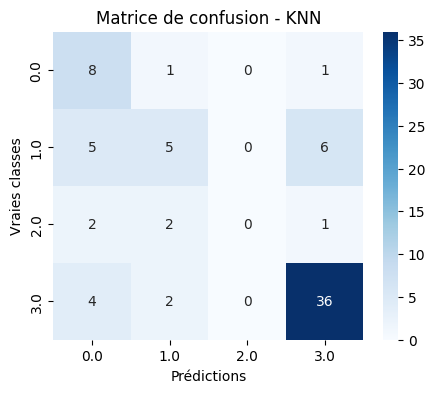

KNN - Accuracy: 0.6712 - F1 Score: 0.6416
###################################################################

 Évaluation de Gradient Boosting avec train_test_split...


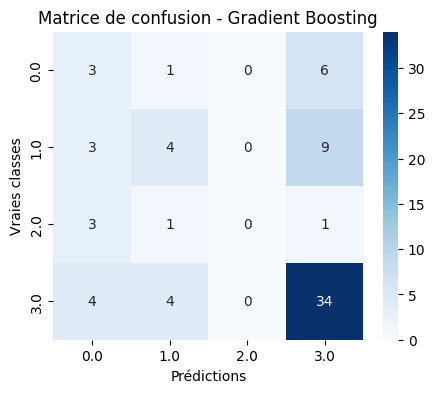

Gradient Boosting - Accuracy: 0.5616 - F1 Score: 0.5284
###################################################################


In [62]:
print("*************************************************Prédiction en fonction de TEXT avec 4 clusters  en suede*************************************************")
X=temp_ext_su.drop(columns=["clusters"])
y=temp_ext_su["clusters"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=42)
results_split = evaluate_models_split(  X_train, X_test, y_train, y_test, models)

In [63]:
print("*************************************************Prédiction en fonction de TEXT avec 4  clusters en suede *************************************************")
X_norm=standardize_data(X)
results_cv = evaluate_models_cv(X_norm, y, models, cv=4)

*************************************************Prédiction en fonction de TEXT avec 4  clusters en suede *************************************************

 Évaluation de Random Forest avec Cross Validation (4-folds)...
Random Forest - Accuracy: 0.6767 - F1 Score: 0.6552
###################################################################

 Évaluation de Logistic Regression avec Cross Validation (4-folds)...
Logistic Regression - Accuracy: 0.7178 - F1 Score: 0.6820
###################################################################

 Évaluation de SVC avec Cross Validation (4-folds)...
SVC - Accuracy: 0.7233 - F1 Score: 0.6627
###################################################################

 Évaluation de KNN avec Cross Validation (4-folds)...
KNN - Accuracy: 0.6959 - F1 Score: 0.6877
###################################################################

 Évaluation de Gradient Boosting avec Cross Validation (4-folds)...
Gradient Boosting - Accuracy: 0.6739 - F1 Score: 0.6652
#######

In [64]:
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

In [65]:
 !pip install catboost

In [66]:
models_boost = {
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="mlogloss"),
    "CatBoost": CatBoostClassifier(verbose=0)
}

*************************************************Prédiction en fonction de TEXT avec 4 clusters  en suede*************************************************

 Évaluation de XGBoost avec train_test_split...


C:\Users\toubia\anaconda3\envs\notebook\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:58:50] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


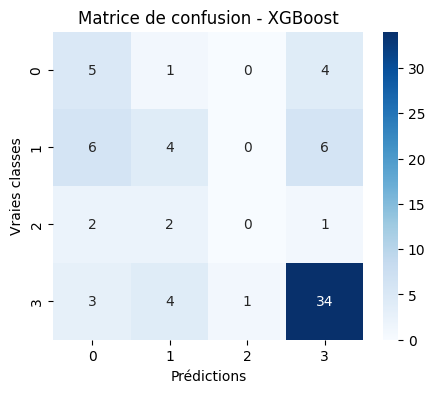

XGBoost - Accuracy: 0.5890 - F1 Score: 0.5673
###################################################################

 Évaluation de CatBoost avec train_test_split...


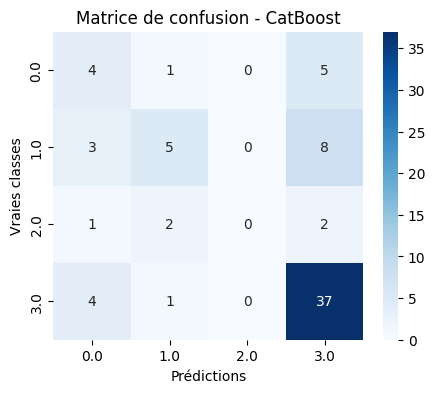

CatBoost - Accuracy: 0.6301 - F1 Score: 0.5904
###################################################################


In [67]:
print("*************************************************Prédiction en fonction de TEXT avec 4 clusters  en suede*************************************************")
X=temp_ext_su.drop(columns=["clusters"])
y=temp_ext_su["clusters"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=42)
results_split = evaluate_models_split(  X_train, X_test, y_train, y_test, models_boost)